In [1]:
from tensorflow.python.keras.layers import Dense,Conv2D,MaxPooling2D,UpSampling2D
from tensorflow.python.keras import Input, Model
from tensorflow.python.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from tensorflow.python.keras.models import Sequential

model = Sequential()

# encoder network
model.add(Conv2D(30, 3, activation= 'relu', padding='same', input_shape = (28,28,1)))
model.add(MaxPooling2D(2, padding= 'same'))
model.add(Conv2D(15, 3, activation= 'relu', padding='same'))
model.add(MaxPooling2D(2, padding= 'same'))

#decoder network
model.add(Conv2D(15, 3, activation= 'relu', padding='same'))
model.add(UpSampling2D(2))
model.add(Conv2D(30, 3, activation= 'relu', padding='same'))
model.add(UpSampling2D(2))
model.add(Conv2D(1,3,activation='sigmoid', padding= 'same')) # output layer

model.compile(optimizer= 'adam', loss = 'binary_crossentropy')

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 30)        300       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 30)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 15)        4065      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 15)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 15)          2040      
_________________________________________________________________
up_sampling2d (UpSampling2D) (None, 14, 14, 15)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 30)        4

In [3]:
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

model.fit(x_train, x_train, epochs=15, batch_size=128, validation_data=(x_test, x_test))

Epoch 1/15
469/469 [==============================] - 88s 186ms/step - loss: 0.2167 - val_loss: 0.0805
Epoch 2/15
469/469 [==============================] - 86s 184ms/step - loss: 0.0798 - val_loss: 0.0753
Epoch 3/15
469/469 [==============================] - 88s 188ms/step - loss: 0.0756 - val_loss: 0.0734
Epoch 4/15
469/469 [==============================] - 88s 188ms/step - loss: 0.0736 - val_loss: 0.0719
Epoch 5/15
469/469 [==============================] - 86s 184ms/step - loss: 0.0722 - val_loss: 0.0712
Epoch 6/15
469/469 [==============================] - 85s 181ms/step - loss: 0.0714 - val_loss: 0.0702
Epoch 7/15
469/469 [==============================] - 85s 182ms/step - loss: 0.0708 - val_loss: 0.0699
Epoch 8/15
469/469 [==============================] - 88s 188ms/step - loss: 0.0702 - val_loss: 0.0694
Epoch 9/15
469/469 [==============================] - 87s 185ms/step - loss: 0.0698 - val_loss: 0.0689
Epoch 10/15
469/469 [==============================] - 87s 185ms/step - l

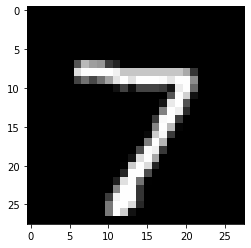

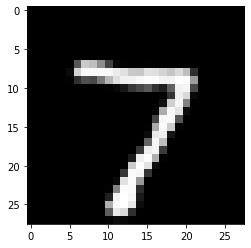

In [13]:
pred = model.predict(x_test)


plt.imshow(x_test[0].reshape(28, 28),cmap='gray')
plt.show()

plt.imshow(pred[0].reshape(28, 28),cmap='gray')
plt.show()

In [7]:
noise_factor = 0.7
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

In [10]:
model = Sequential()

# encoder network
model.add(Conv2D(35, 3, activation= 'relu', padding='same', input_shape = (28,28,1)))
model.add(MaxPooling2D(2, padding= 'same'))
model.add(Conv2D(25, 3, activation= 'relu', padding='same'))
model.add(MaxPooling2D(2, padding= 'same'))

#decoder network
model.add(Conv2D(25, 3, activation= 'relu', padding='same'))
model.add(UpSampling2D(2))
model.add(Conv2D(35, 3, activation= 'relu', padding='same'))
model.add(UpSampling2D(2))
model.add(Conv2D(1,3,activation='sigmoid', padding= 'same')) # output layer

model.compile(optimizer= 'adam', loss = 'binary_crossentropy')

model.fit(x_train, x_train, epochs=15, batch_size=128, validation_data=(x_test, x_test))

Epoch 1/15
469/469 [==============================] - 104s 220ms/step - loss: 0.1982 - val_loss: 0.0770
Epoch 2/15
469/469 [==============================] - 102s 218ms/step - loss: 0.0765 - val_loss: 0.0728
Epoch 3/15
469/469 [==============================] - 97s 206ms/step - loss: 0.0730 - val_loss: 0.0712
Epoch 4/15
469/469 [==============================] - 98s 208ms/step - loss: 0.0715 - val_loss: 0.0700
Epoch 5/15
469/469 [==============================] - 101s 216ms/step - loss: 0.0704 - val_loss: 0.0691
Epoch 6/15
469/469 [==============================] - 100s 213ms/step - loss: 0.0697 - val_loss: 0.0693
Epoch 7/15
469/469 [==============================] - 100s 212ms/step - loss: 0.0690 - val_loss: 0.0684
Epoch 8/15
469/469 [==============================] - 101s 216ms/step - loss: 0.0685 - val_loss: 0.0676
Epoch 9/15
469/469 [==============================] - 105s 223ms/step - loss: 0.0681 - val_loss: 0.0673
Epoch 10/15
469/469 [==============================] - 103s 219ms/

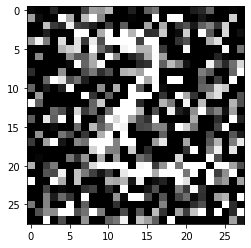

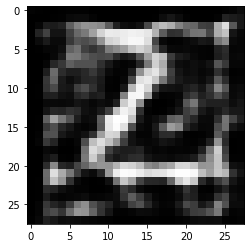

In [12]:
pred = model.predict(x_test_noisy)

plt.imshow(x_test_noisy[1].reshape(28, 28),cmap='gray')
plt.show()

plt.imshow(pred[1].reshape(28, 28),cmap='gray')
plt.show()